In [13]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Use numpy to convert to arrays
import numpy as np

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
import pmdarima as pm

## pmdarima Requirements

# numpy (1.16.2)
# scipy (1.2.1)
# scikit-learn (0.20.1) 
# pandas (0.23.4
# statsmodels (0.9.0) 
# Cython (0.29.2)
# pmdarima (1.2.1)

In [14]:
# Load the "continental_primary_energy_consumption.xlsx" Dataset

cont_consumption_data = pd.read_excel("data/continental_primary_energy_consumption.xlsx", sheet_name=1)
cont_consumption_data.head()

,Year,Africa,Asia_Oceania,Central_South_America,Eurasia,Europe,Middle_East,North_America,World
0,1980,6.817428,51.490156,11.107592,51.679526,75.060179,5.862700,91.421257,293.438838
1,1981,7.018484,52.198798,11.069586,52.055516,72.817698,6.169371,89.855369,291.184821
2,1982,7.620669,53.050275,11.233601,54.180889,72.440712,6.398765,86.707933,291.632844
3,1983,8.011749,54.787733,11.141228,55.226312,72.722676,7.201808,86.277598,295.369104
4,1984,8.423170,58.557924,11.823249,58.214456,73.831992,7.809684,90.469655,309.130130


In [16]:
X = cont_consumption_data['Year']
Y = np.vstack([cont_consumption_data['Africa'], cont_consumption_data['Asia_Oceania'], cont_consumption_data['Central_South_America'], cont_consumption_data['Eurasia'], cont_consumption_data['Europe'], cont_consumption_data['Middle_East'], cont_consumption_data['North_America'], cont_consumption_data['World']])

<function matplotlib.pyplot.show(*args, **kw)>

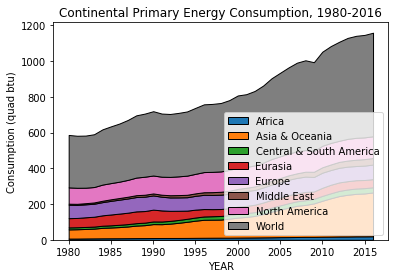

In [17]:
labels = ['Africa', 'Asia & Oceania', 'Central & South America', 'Eurasia', 'Europe', 'Middle East', 'North America', 'World']
plt.stackplot(X, Y, labels=labels, edgecolor='black')
plt.legend(loc=4)

plt.xlabel('YEAR')
plt.ylabel('Consumption (quad btu)')
plt.title('Continental Primary Energy Consumption, 1980-2016')

plt.show

In [18]:
# Check if the Africa series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
Africa_result = adfuller(cont_consumption_data.Africa)
print('ADF Statistic: %f' % Africa_result[0])
print('p-value: %f' % Africa_result[1])

ADF Statistic: 1.855578
p-value: 0.998453


In [19]:
Africa_model = pm.auto_arima(cont_consumption_data.Africa, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Africa_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=-0.490, BIC=5.731, Fit time=0.070 seconds
Fit ARIMA: order=(0, 2, 0); AIC=21.651, BIC=24.762, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1.518, BIC=6.184, Fit time=0.017 seconds
Fit ARIMA: order=(0, 2, 1); AIC=-1.904, BIC=2.762, Fit time=0.018 seconds
Fit ARIMA: order=(0, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 2); AIC=0.542, BIC=8.319, Fit time=0.076 seconds
Total fit time: 0.194 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   35
Model:                 ARIMA(0, 2, 1)   Log Likelihood                   3.952
Method:                       css-mle   S.D. of innovations              0.205
Date:                Fri, 02 Aug 2019   AIC                             -1.904
Time:                        02:12:20   BIC                              2.762
Sample:                             2   HQIC                

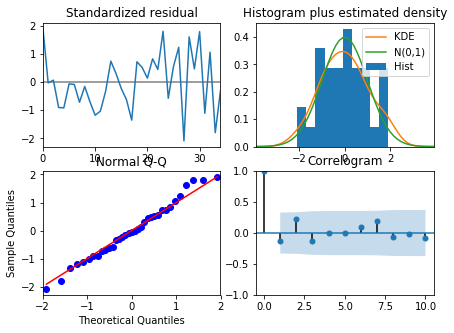

In [20]:
Africa_model.plot_diagnostics(figsize=(7,5))
plt.show()

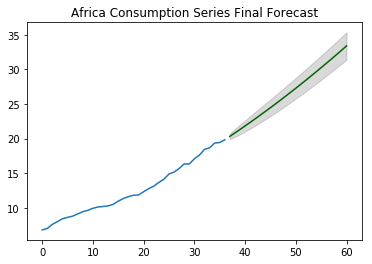

In [23]:
# Africa Series Forecast
n_periods = 24
fc, confint = Africa_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(cont_consumption_data.Africa), len(cont_consumption_data.Africa)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Africa Plot
plt.plot(cont_consumption_data.Africa)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Africa Consumption Series Final Forecast")
plt.show()

In [24]:
# Check if the Asia_Oceania series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
Asia_Oceania_result = adfuller(cont_consumption_data.Africa)
print('ADF Statistic: %f' % Asia_Oceania_result[0])
print('p-value: %f' % Asia_Oceania_result[1])

ADF Statistic: 1.855578
p-value: 0.998453


In [25]:
Asia_Oceania_model = pm.auto_arima(cont_consumption_data.Asia_Oceania, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Asia_Oceania_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=177.602, BIC=180.713, Fit time=0.004 seconds
Fit ARIMA: order=(1, 2, 0); AIC=179.586, BIC=184.252, Fit time=0.023 seconds
Fit ARIMA: order=(0, 2, 1); AIC=179.574, BIC=184.240, Fit time=0.013 seconds
Total fit time: 0.056 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   35
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 -86.801
Method:                           css   S.D. of innovations              2.890
Date:                Fri, 02 Aug 2019   AIC                            177.602
Time:                        02:23:13   BIC                            180.713
Sample:                             2   HQIC                           178.676
                                                                              
                 coef    std err        

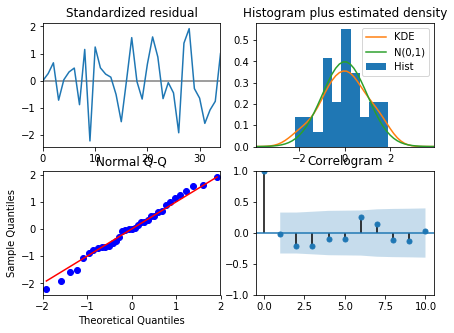

In [26]:
Asia_Oceania_model.plot_diagnostics(figsize=(7,5))
plt.show()

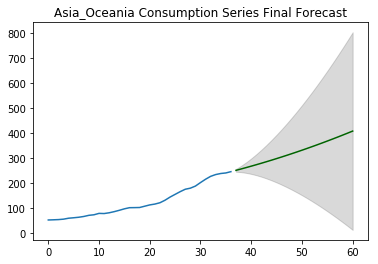

In [27]:
# Asia_Oceania Series Forecast
n_periods = 24
fc, confint = Asia_Oceania_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(cont_consumption_data.Asia_Oceania), len(cont_consumption_data.Asia_Oceania)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Asia_Oceania Plot
plt.plot(cont_consumption_data.Asia_Oceania)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Asia_Oceania Consumption Series Final Forecast")
plt.show()

In [28]:
# Check if the Central_South_America series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
Central_South_America_result = adfuller(cont_consumption_data.Central_South_America)
print('ADF Statistic: %f' % Central_South_America_result[0])
print('p-value: %f' % Central_South_America_result[1])

ADF Statistic: 0.075198
p-value: 0.964326


In [29]:
Central_South_America_model = pm.auto_arima(cont_consumption_data.Central_South_America, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Central_South_America_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=58.371, BIC=64.592, Fit time=0.057 seconds
Fit ARIMA: order=(0, 2, 0); AIC=70.151, BIC=73.262, Fit time=0.004 seconds
Fit ARIMA: order=(1, 2, 0); AIC=58.313, BIC=62.979, Fit time=0.013 seconds
Fit ARIMA: order=(0, 2, 1); AIC=56.499, BIC=61.165, Fit time=0.023 seconds
Fit ARIMA: order=(0, 2, 2); AIC=58.455, BIC=64.677, Fit time=0.029 seconds
Fit ARIMA: order=(1, 2, 2); AIC=58.508, BIC=66.284, Fit time=0.161 seconds
Total fit time: 0.296 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   35
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 -25.249
Method:                       css-mle   S.D. of innovations              0.490
Date:                Fri, 02 Aug 2019   AIC                             56.499
Time:                        02:26:52   BIC                             61.165
Sample:                             2   HQIC  

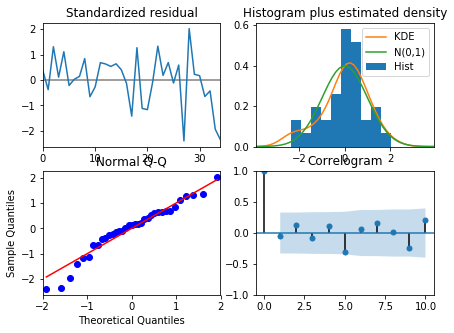

In [30]:
Central_South_America_model.plot_diagnostics(figsize=(7,5))
plt.show()

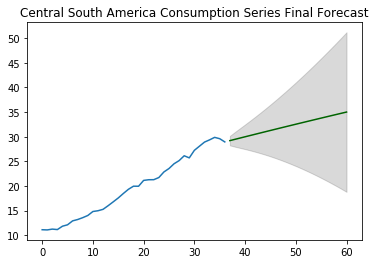

In [31]:
# Central_South_America Series Forecast
n_periods = 24
fc, confint = Central_South_America_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(cont_consumption_data.Central_South_America), len(cont_consumption_data.Central_South_America)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Asia_Oceania Plot
plt.plot(cont_consumption_data.Central_South_America)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Central South America Consumption Series Final Forecast")
plt.show()

In [32]:
# Check if the Eurasia series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
Eurasia_result = adfuller(cont_consumption_data.Eurasia)
print('ADF Statistic: %f' % Eurasia_result[0])
print('p-value: %f' % Eurasia_result[1])

ADF Statistic: -2.272609
p-value: 0.180954


In [33]:
Eurasia_model = pm.auto_arima(cont_consumption_data.Eurasia, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Eurasia_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=164.393, BIC=170.614, Fit time=0.041 seconds
Fit ARIMA: order=(0, 2, 0); AIC=170.357, BIC=173.468, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=163.313, BIC=167.979, Fit time=0.014 seconds
Fit ARIMA: order=(0, 2, 1); AIC=162.866, BIC=167.532, Fit time=0.012 seconds
Fit ARIMA: order=(0, 2, 2); AIC=164.387, BIC=170.608, Fit time=0.018 seconds
Fit ARIMA: order=(1, 2, 2); AIC=166.870, BIC=174.647, Fit time=0.165 seconds
Total fit time: 0.261 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   35
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 -78.433
Method:                       css-mle   S.D. of innovations              2.265
Date:                Fri, 02 Aug 2019   AIC                            162.866
Time:                        02:29:24   BIC                            167.532
Sample:                           

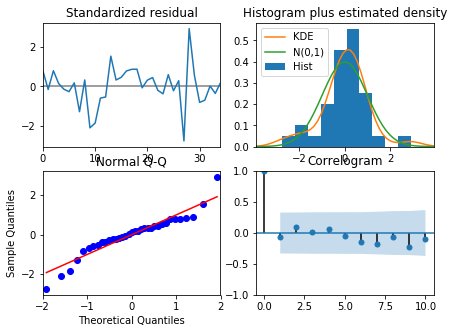

In [34]:
Eurasia_model.plot_diagnostics(figsize=(7,5))
plt.show()

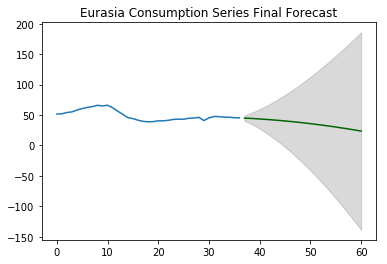

In [35]:
# Eurasia Series Forecast
n_periods = 24
fc, confint = Eurasia_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(cont_consumption_data.Eurasia), len(cont_consumption_data.Eurasia)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Eurasia Plot
plt.plot(cont_consumption_data.Eurasia)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Eurasia Consumption Series Final Forecast")
plt.show()

In [36]:
# Check if the Europe series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
Europe_result = adfuller(cont_consumption_data.Europe)
print('ADF Statistic: %f' % Europe_result[0])
print('p-value: %f' % Europe_result[1])

ADF Statistic: -1.458210
p-value: 0.554074


In [37]:
Europe_model = pm.auto_arima(cont_consumption_data.Europe, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Europe_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=147.702, BIC=153.924, Fit time=0.037 seconds
Fit ARIMA: order=(0, 2, 0); AIC=159.505, BIC=162.615, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=146.292, BIC=150.958, Fit time=0.018 seconds
Fit ARIMA: order=(0, 2, 1); AIC=143.771, BIC=148.437, Fit time=0.034 seconds
Fit ARIMA: order=(0, 2, 2); AIC=148.567, BIC=154.789, Fit time=0.021 seconds
Fit ARIMA: order=(1, 2, 2); AIC=149.423, BIC=157.200, Fit time=0.038 seconds
Total fit time: 0.161 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   35
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 -68.885
Method:                       css-mle   S.D. of innovations              1.646
Date:                Fri, 02 Aug 2019   AIC                            143.771
Time:                        02:31:46   BIC                            148.437
Sample:                           

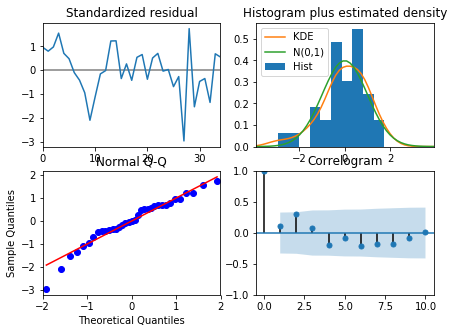

In [38]:
Europe_model.plot_diagnostics(figsize=(7,5))
plt.show()

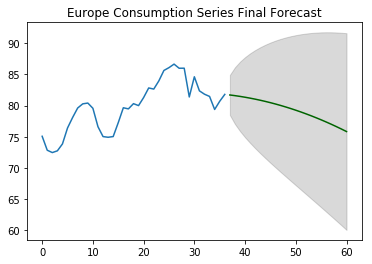

In [40]:
# Europe Series Forecast
n_periods = 24
fc, confint = Europe_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(cont_consumption_data.Europe), len(cont_consumption_data.Europe)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Europe Plot
plt.plot(cont_consumption_data.Europe)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Europe Consumption Series Final Forecast")
plt.show()

In [41]:
# Check if the Middle_East series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
Middle_East_result = adfuller(cont_consumption_data.Middle_East)
print('ADF Statistic: %f' % Middle_East_result[0])
print('p-value: %f' % Middle_East_result[1])

ADF Statistic: 3.389841
p-value: 1.000000


In [42]:
Middle_East_model = pm.auto_arima(cont_consumption_data.Middle_East, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Middle_East_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=48.618, BIC=54.839, Fit time=0.066 seconds
Fit ARIMA: order=(0, 2, 0); AIC=58.898, BIC=62.009, Fit time=0.004 seconds
Fit ARIMA: order=(1, 2, 0); AIC=55.640, BIC=60.306, Fit time=0.020 seconds
Fit ARIMA: order=(0, 2, 1); AIC=46.962, BIC=51.628, Fit time=0.020 seconds
Fit ARIMA: order=(0, 2, 2); AIC=48.504, BIC=54.725, Fit time=0.041 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.168 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   35
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 -20.481
Method:                       css-mle   S.D. of innovations              0.413
Date:                Fri, 02 Aug 2019   AIC                             46.962
Time:                        02:33:49   BIC                             51.628
Sample:                             2   HQIC          

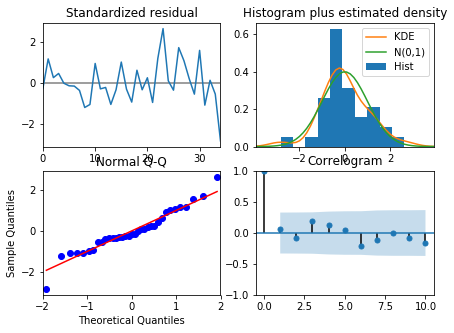

In [43]:
Middle_East_model.plot_diagnostics(figsize=(7,5))
plt.show()

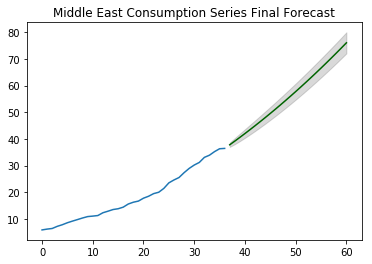

In [44]:
# Middle_East Series Forecast
n_periods = 24
fc, confint = Middle_East_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(cont_consumption_data.Middle_East), len(cont_consumption_data.Middle_East)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Middle_East Plot
plt.plot(cont_consumption_data.Middle_East)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Middle East Consumption Series Final Forecast")
plt.show()

In [45]:
# Check if the North_America series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
North_America_result = adfuller(cont_consumption_data.North_America)
print('ADF Statistic: %f' % North_America_result[0])
print('p-value: %f' % North_America_result[1])

ADF Statistic: -1.062199
p-value: 0.729909


In [46]:
North_America_model = pm.auto_arima(cont_consumption_data.North_America, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(North_America_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=165.004, BIC=171.225, Fit time=0.073 seconds
Fit ARIMA: order=(0, 2, 0); AIC=179.982, BIC=183.092, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=176.873, BIC=181.539, Fit time=0.009 seconds
Fit ARIMA: order=(0, 2, 1); AIC=163.104, BIC=167.770, Fit time=0.029 seconds
Fit ARIMA: order=(0, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 2); AIC=165.048, BIC=172.825, Fit time=0.099 seconds
Total fit time: 0.222 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   35
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 -78.552
Method:                       css-mle   S.D. of innovations              2.169
Date:                Fri, 02 Aug 2019   AIC                            163.104
Time:                        02:35:53   BIC                            167.770
Sample:                             2   HQIC

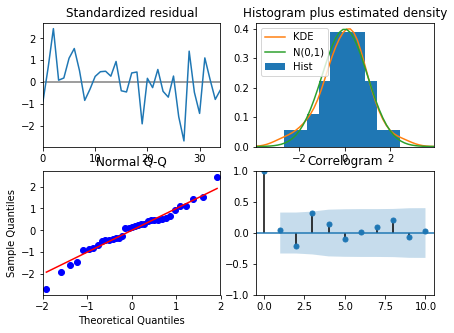

In [47]:
North_America_model.plot_diagnostics(figsize=(7,5))
plt.show()

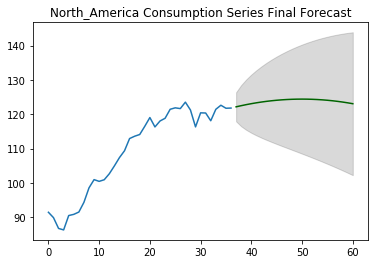

In [48]:
# North_America Series Forecast
n_periods = 24
fc, confint = North_America_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(cont_consumption_data.North_America), len(cont_consumption_data.North_America)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# North_America Plot
plt.plot(cont_consumption_data.North_America)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("North_America Consumption Series Final Forecast")
plt.show()

In [49]:
# Check if the World series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
World_result = adfuller(cont_consumption_data.World)
print('ADF Statistic: %f' % World_result[0])
print('p-value: %f' % World_result[1])

ADF Statistic: 1.555606
p-value: 0.997718


In [50]:
World_model = pm.auto_arima(cont_consumption_data.World, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(World_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=243.198, BIC=249.420, Fit time=0.047 seconds
Fit ARIMA: order=(0, 2, 0); AIC=252.536, BIC=255.647, Fit time=0.002 seconds
Fit ARIMA: order=(1, 2, 0); AIC=249.881, BIC=254.547, Fit time=0.023 seconds
Fit ARIMA: order=(0, 2, 1); AIC=243.461, BIC=248.127, Fit time=0.041 seconds
Fit ARIMA: order=(2, 2, 1); AIC=245.147, BIC=252.923, Fit time=0.050 seconds
Fit ARIMA: order=(1, 2, 2); AIC=247.461, BIC=255.238, Fit time=0.239 seconds
Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.501 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   35
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -117.599
Method:                       css-mle   S.D. of innovations              6.667
Date:                Fri, 02 Aug 2019   AIC                            243.198
Time:                        02:36:58   BIC   

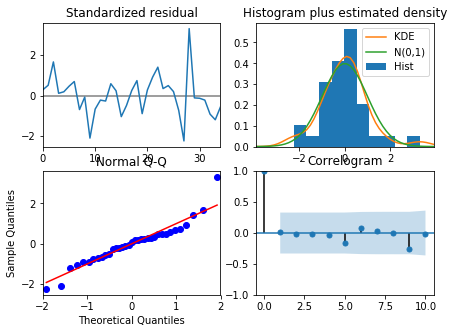

In [51]:
World_model.plot_diagnostics(figsize=(7,5))
plt.show()

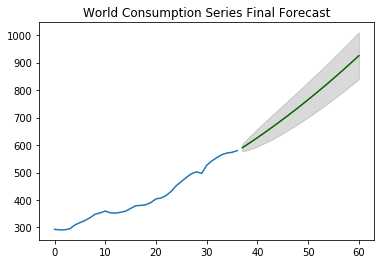

In [52]:
# World Series Forecast
n_periods = 24
fc, confint = World_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(cont_consumption_data.World), len(cont_consumption_data.World)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# World Plot
plt.plot(cont_consumption_data.World)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("World Consumption Series Final Forecast")
plt.show()